In [ ]:
%cd D:/Documents/SEMESTER 8/EE405 - Undergraduate Project/INR/Playground/Wire Implementation

D:\Documents\SEMESTER 8\EE405 - Undergraduate Project\INR\Playground\Wire Implementation


In [28]:
import cv2
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt

import torch

from modules.utils import psnr

In [4]:
mat_o5_s5 = './results/denoising/wire_o5.0s5.0.mat'
mat_o5_s4 = './results/denoising/wire_o5.0s4.0.mat'
mat_o5_s6 = './results/denoising/wire_o5.0s6.0.mat'
mat_o4_s5 = './results/denoising/wire_o4.0s5.0.mat'
mat_o6_s5 = './results/denoising/wire_o6.0s5.0.mat'
mat_o5_s5 = io.loadmat(mat_o5_s5)
mat_o5_s4 = io.loadmat(mat_o5_s4)
mat_o5_s6 = io.loadmat(mat_o5_s6)
mat_o4_s5 = io.loadmat(mat_o4_s5)
mat_o6_s5 = io.loadmat(mat_o6_s5)

mat_skip1 = './results/denoising_jumble/wire_jumble_skip1.mat'
mat_skip2 = './results/denoising_jumble/wire_jumble_skip2.mat'
mat_skip3 = './results/denoising_jumble/wire_jumble_skip3.mat'
mat_skip1 = io.loadmat(mat_skip1)
mat_skip2 = io.loadmat(mat_skip2)
mat_skip3 = io.loadmat(mat_skip3)

In [26]:
mat_o4_s5.keys(), '\n', mat_skip1.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'rec', 'get', 'im_noisy', 'mse_noisy array', 'mse_array', 'time_array']),
 '\n',
 dict_keys(['__header__', '__version__', '__globals__', 'rec', 'get', 'im_noisy', 'mse_array', 'time_array']))

In [48]:
# Example: Create random image arrays (for demonstration)
images1 = [mat_o5_s5['get'],
    mat_o5_s4['rec'], mat_o5_s5['rec'], mat_o5_s6['rec'],
    ]  # List of 6 random (10x10) images

images2 = [mat_o5_s5['get'],
    mat_o4_s5['rec'], mat_o5_s5['rec'], mat_o6_s5['rec']
]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


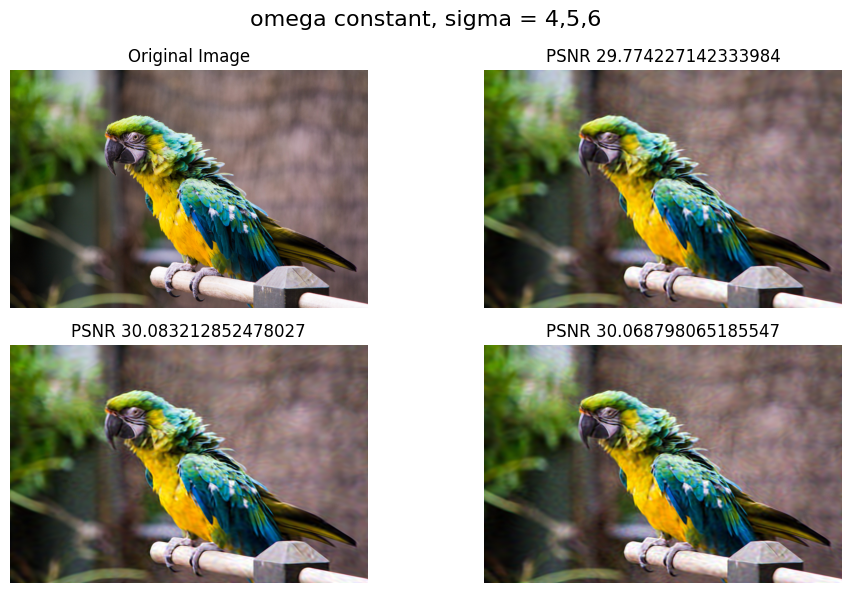

In [49]:
# Create a figure with a 2x3 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2 rows, 3 columns

# Iterate over the images and axes to plot each image

fig.suptitle('omega constant, sigma = 4,5,6', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(images1[i], cmap='gray')  # Display image, assume grayscale for simplicity
    if i == 0: ax.set_title(f"Original Image")       # Set a title for each subplot
    else: 
        psnr0 = psnr(images1[0], images1[i])
        ax.set_title(f"PSNR {psnr0}")
    ax.axis('off')                     # Optionally turn off the axis

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

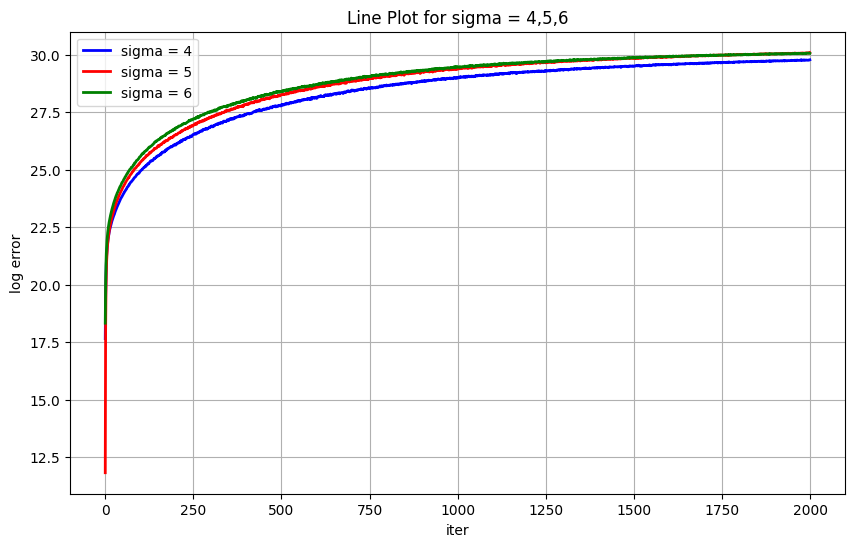

In [60]:
mse1 = [-10*np.log10(mse) for mse in mat_o5_s4['mse_array'].flatten()]
mse2 = [-10*np.log10(mse) for mse in mat_o5_s5['mse_array'].flatten()]
mse3 = [-10*np.log10(mse) for mse in mat_o5_s6['mse_array'].flatten()]

x = np.arange((2000))  # X-axis values
y1 = mse1               # First dataset (sine function)
y2 = mse2                # Second dataset (cosine function)
y3 = mse3   # Third dataset (sine + cosine)

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x, y1, label='sigma = 4', color='blue', linewidth=2)  # Plot first line
plt.plot(x, y2, label='sigma = 5', color='red', linewidth=2)  # Plot second line
plt.plot(x, y3, label='sigma = 6', color='green', linewidth=2)  # Plot third line

# Adding title and labels
plt.title('Line Plot for sigma = 4,5,6')
plt.xlabel('iter')
plt.ylabel('log error')

# Add a legend to distinguish the lines
plt.legend()

# Show grid for better readability
plt.grid()

# Display the plot
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


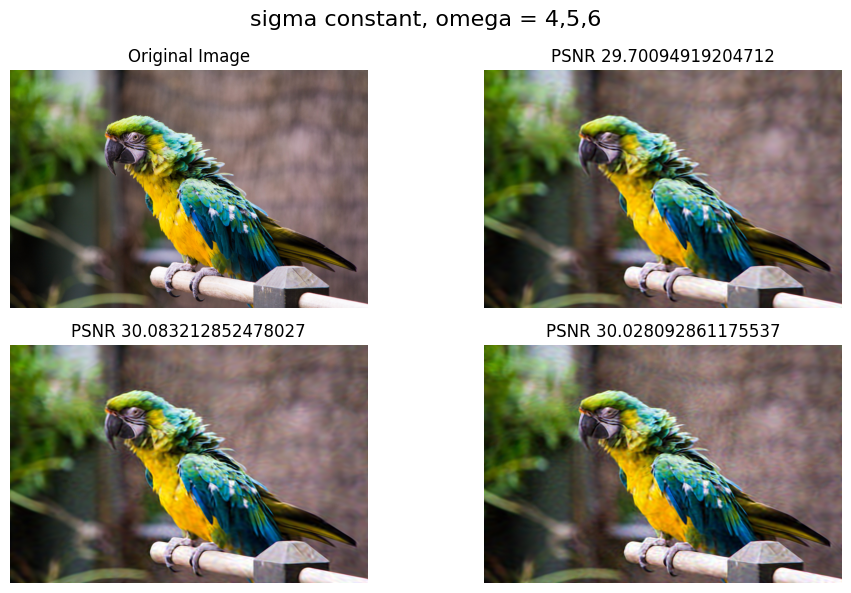

In [50]:
# Create a figure with a 2x3 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2 rows, 3 columns

# Iterate over the images and axes to plot each image

fig.suptitle('sigma constant, omega = 4,5,6', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(images2[i], cmap='gray')  # Display image, assume grayscale for simplicity
    if i == 0: ax.set_title(f"Original Image")       # Set a title for each subplot
    else: 
        psnr0 = psnr(images2[0], images2[i])
        ax.set_title(f"PSNR {psnr0}")
    ax.axis('off')                     # Optionally turn off the axis

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

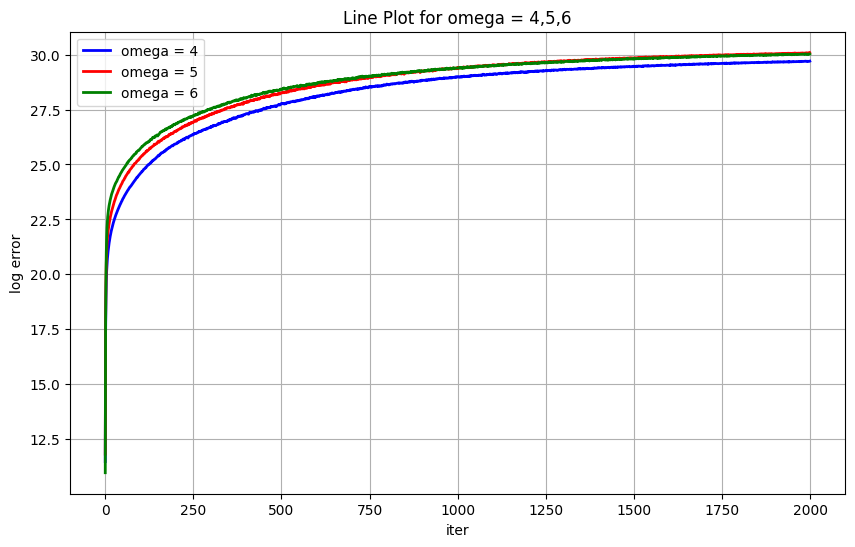

In [59]:
mse1 = [-10*np.log10(mse) for mse in mat_o4_s5['mse_array'].flatten()]
mse2 = [-10*np.log10(mse) for mse in mat_o5_s5['mse_array'].flatten()]
mse3 = [-10*np.log10(mse) for mse in mat_o6_s5['mse_array'].flatten()]

x = np.arange((2000))  # X-axis values
y1 = mse1               # First dataset (sine function)
y2 = mse2                # Second dataset (cosine function)
y3 = mse3   # Third dataset (sine + cosine)

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x, y1, label='omega = 4', color='blue', linewidth=2)  # Plot first line
plt.plot(x, y2, label='omega = 5', color='red', linewidth=2)  # Plot second line
plt.plot(x, y3, label='omega = 6', color='green', linewidth=2)  # Plot third line

# Adding title and labels
plt.title('Line Plot for omega = 4,5,6')
plt.xlabel('iter')
plt.ylabel('log error')

# Add a legend to distinguish the lines
plt.legend()

# Show grid for better readability
plt.grid()

# Display the plot
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


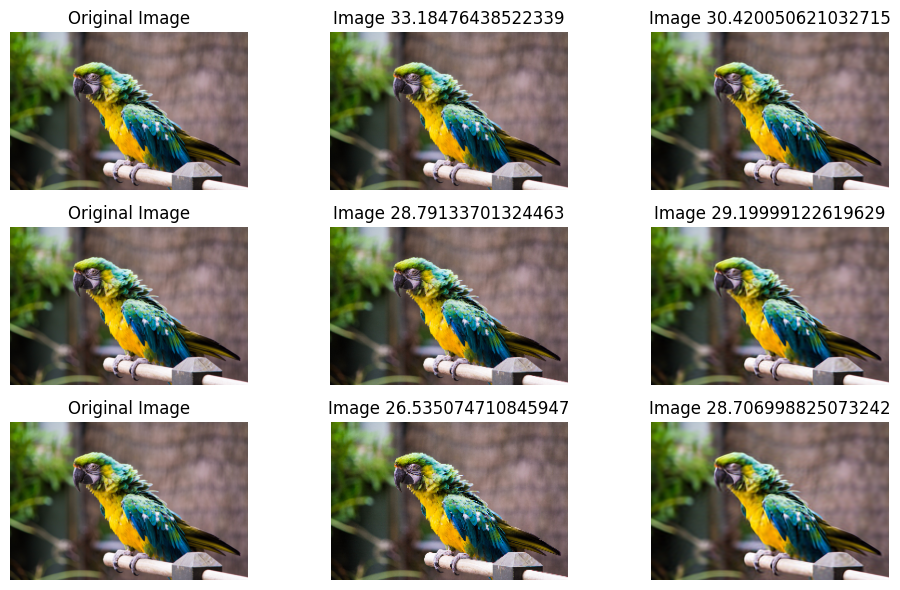

In [23]:
# Example: Create random image arrays (for demonstration)
images = [
    mat_skip1['get'], mat_skip1['get'][::2, ::2, :], mat_skip1['rec'],
    mat_skip2['get'], mat_skip2['get'][::3, ::3, :], mat_skip2['rec'],
    mat_skip3['get'], mat_skip3['get'][::4, ::4, :], mat_skip3['rec'],
    ]  # List of 6 random (10x10) images

# Create a figure with a 2x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 6))  # 2 rows, 3 columns

# Iterate over the images and axes to plot each image
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display image, assume grayscale for simplicity
    if i%3 == 0: ax.set_title(f"Original Image")       # Set a title for each subplot
    else:
        try: 
            try:
                try : 
                    psnr0 = psnr(images[0], images[i])
                except:            
                    psnr0 = psnr(cv2.resize(images[0], None, fx=1/2, fy=1/2, interpolation=cv2.INTER_AREA), images[i])
            except:
                psnr0 = psnr(cv2.resize(images[0], None, fx=1/3, fy=1/3, interpolation=cv2.INTER_AREA), images[i])
        except:
            psnr0 = psnr(cv2.resize(images[0], None, fx=1/4, fy=1/4, interpolation=cv2.INTER_AREA), images[i])
        ax.set_title(f"Image PSNR {psnr0}dB") 
    ax.axis('off')                     # Optionally turn off the axis

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

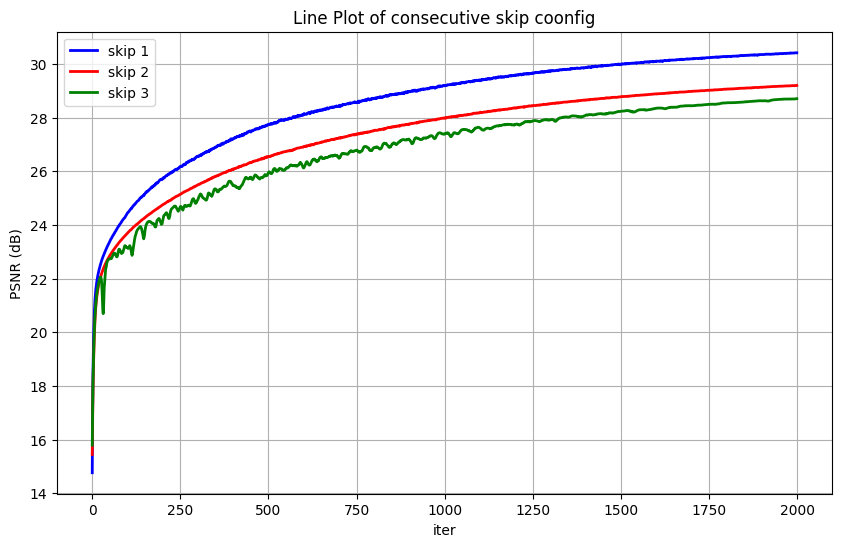

In [38]:
mse1 = [-10*np.log10(mse) for mse in mat_skip1['mse_array'].flatten()]
mse2 = [-10*np.log10(mse) for mse in mat_skip2['mse_array'].flatten()]
mse3 = [-10*np.log10(mse) for mse in mat_skip3['mse_array'].flatten()]

x = np.arange((2000))  # X-axis values
y1 = mse1               # First dataset (sine function)
y2 = mse2                # Second dataset (cosine function)
y3 = mse3   # Third dataset (sine + cosine)

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x, y1, label='skip 1', color='blue', linewidth=2)  # Plot first line
plt.plot(x, y2, label='skip 2', color='red', linewidth=2)  # Plot second line
plt.plot(x, y3, label='skip 3', color='green', linewidth=2)  # Plot third line

# Adding title and labels
plt.title('Line Plot of consecutive skip coonfig')
plt.xlabel('iter')
plt.ylabel('PSNR (dB)')

# Add a legend to distinguish the lines
plt.legend()

# Show grid for better readability
plt.grid()

# Display the plot
plt.show()
